In [2]:
!python --version

Python 3.11.13


In [3]:
!where python

C:\Users\yvnyl\anaconda3\envs\env-ml-zoomcamp-2025\python.exe
C:\Users\yvnyl\anaconda3\python.exe
C:\Python313\python.exe
C:\Users\yvnyl\AppData\Local\Microsoft\WindowsApps\python.exe


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('hw6_car_fuel_efficiency.csv')

In [6]:
df.head

<bound method NDFrame.head of       engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                     170            3.0       159.0     3413.433759   
1                     130            5.0        97.0     3149.664934   
2                     170            NaN        78.0     3079.038997   
3                     220            4.0         NaN     2542.392402   
4                     210            1.0       140.0     3460.870990   
...                   ...            ...         ...             ...   
9699                  140            5.0       164.0     2981.107371   
9700                  180            NaN       154.0     2439.525729   
9701                  220            2.0       138.0     2583.471318   
9702                  230            4.0       177.0     2905.527390   
9703                  270            3.0       140.0     2908.043477   

      acceleration  model_year  origin fuel_type         drivetrain  \
0             17.7        2003  Eu

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [9]:
col_num = ['engine_displacement','num_cylinders','horsepower','vehicle_weight',
           'acceleration','model_year','num_doors']
col_cat = ['origin','fuel_type','drivetrain']

In [10]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [11]:
df[col_num] = df[col_num].fillna(value=0)

In [12]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
[df_full_train,df_test] = train_test_split(df,test_size=0.2,random_state=1)
[df_train,df_val] = train_test_split(df_full_train,test_size=0.25,random_state=1)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(5822, 11)
(1941, 11)
(1941, 11)


In [14]:
y_test = df_test.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_train = df_train.fuel_efficiency_mpg.values

In [15]:
df_test = df_test.drop(columns=['fuel_efficiency_mpg'])
df_val = df_val.drop(columns=['fuel_efficiency_mpg'])
df_train = df_train.drop(columns=['fuel_efficiency_mpg'])

In [16]:
df_full_train = df_full_train.drop(columns=['fuel_efficiency_mpg'])

In [17]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))
X_full_train = dv.transform(df_full_train.to_dict(orient='records'))

In [18]:
dv.get_feature_names_out()

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [19]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1)

In [20]:
model.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
from sklearn.tree import export_text

In [22]:
export_text(model,feature_names=dv.get_feature_names_out())

'|--- vehicle_weight <= 3022.11\n|   |--- value: [16.88]\n|--- vehicle_weight >  3022.11\n|   |--- value: [12.94]\n'

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model2 = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)

In [25]:
model2.fit(X_train,y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_val_hat = model2.predict(X_val)

In [27]:
((y_val - y_val_hat)**2).mean()**0.5

np.float64(0.4595777223092726)

In [28]:
def val_RMSE(model):
    y_val_hat = model.predict(X_val)
    return ((y_val - y_val_hat)**2).mean()**0.5


In [30]:
val_RMSE(model2)

np.float64(0.4595777223092726)

In [31]:
import numpy as np

In [32]:
n_ests = np.arange(10,201,10)
RMSEs = np.zeros(n_ests.shape)
for idx in range(n_ests.shape[0]):
    model3 = RandomForestRegressor(n_estimators=n_ests[idx],random_state=1,n_jobs=-1)
    model3.fit(X_train,y_train)
    RMSEs[idx] = val_RMSE(model3)

In [34]:
pd.DataFrame({'n_estimators':n_ests,'RMSE':RMSEs.round(3)})

,n_estimators,RMSE
0,10,0.460
1,20,0.454
2,30,0.452
3,40,0.449
4,50,0.447
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.445


In [59]:
import seaborn as sns

<Axes: >

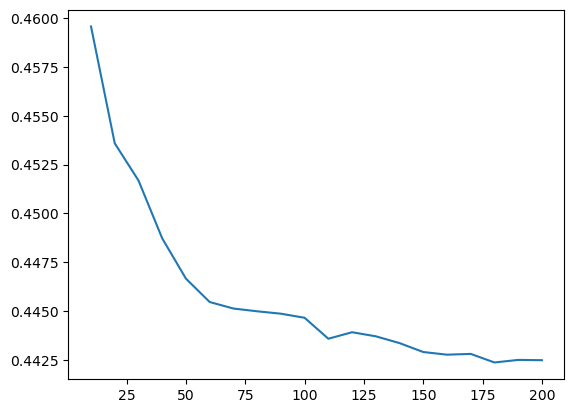

In [60]:
sns.lineplot(x=n_ests,y=RMSEs)

In [63]:
md=[10,15,20,25]
RMSEs_2D=np.zeros((20,4))
for idx1 in range(n_ests.shape[0]):
    for idx2 in range(4):
        model4 = RandomForestRegressor(n_estimators=n_ests[idx1],max_depth=md[idx2],random_state=1,n_jobs=-1)
        model4.fit(X_train,y_train)
        RMSEs_2D[idx1,idx2]=val_RMSE(model4)

In [64]:
RMSEs_2D

array([[0.45024866, 0.45762385, 0.45873868, 0.45945452],
       [0.44685703, 0.45307187, 0.45402939, 0.45392054],
       [0.44547396, 0.4508687 , 0.45198174, 0.45208345],
       [0.44306731, 0.44860935, 0.44931456, 0.44898611],
       [0.44195669, 0.44631808, 0.44731243, 0.44690065],
       [0.44167303, 0.44529206, 0.44613304, 0.44570285],
       [0.44129755, 0.4446057 , 0.44548516, 0.44528099],
       [0.44143524, 0.44456685, 0.44584775, 0.44515115],
       [0.44152152, 0.44457622, 0.44579346, 0.44501136],
       [0.441217  , 0.44434108, 0.44530655, 0.44477793],
       [0.44052623, 0.44347885, 0.44419901, 0.44373325],
       [0.44070837, 0.44373415, 0.44449721, 0.44400694],
       [0.4406295 , 0.44354574, 0.44412053, 0.44379063],
       [0.44033941, 0.4431627 , 0.44376434, 0.44339529],
       [0.4399427 , 0.44273155, 0.44330798, 0.44293707],
       [0.43979741, 0.44250727, 0.44317839, 0.44279987],
       [0.44001744, 0.44255662, 0.44332087, 0.44284339],
       [0.43974887, 0.44206061,

In [65]:
RMSEs_2D.mean(axis=0)

array([0.44180786, 0.44541664, 0.44625292, 0.44590994])

In [69]:
model5 = RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1,n_jobs=-1)
model5.fit(X_train,y_train)
pd.DataFrame({'feature':dv.get_feature_names_out(),'importance':model5.feature_importances_})

,feature,importance
0,acceleration,0.011480
1,drivetrain=All-wheel drive,0.000357
2,drivetrain=Front-wheel drive,0.000345
3,engine_displacement,0.003273
4,fuel_type=Diesel,0.000325
5,fuel_type=Gasoline,0.000360
6,horsepower,0.015998
7,model_year,0.003212
8,num_cylinders,0.002343
9,num_doors,0.001635


In [35]:
!pip install xgboost

In [36]:
import xgboost as xgb

In [37]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [38]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [39]:
%%capture output
mdl_xgb = xgb.train(xgb_params, dtrain,
                    num_boost_round=100,
                    evals=watchlist, verbose_eval=1)

In [86]:
output.stdout

'[0]\ttrain-rmse:2.28944\tval-rmse:2.34561\n[1]\ttrain-rmse:2.07396\tval-rmse:2.12434\n[2]\ttrain-rmse:1.88066\tval-rmse:1.92597\n[3]\ttrain-rmse:1.70730\tval-rmse:1.74987\n[4]\ttrain-rmse:1.55163\tval-rmse:1.59059\n[5]\ttrain-rmse:1.41247\tval-rmse:1.44988\n[6]\ttrain-rmse:1.28796\tval-rmse:1.32329\n[7]\ttrain-rmse:1.17660\tval-rmse:1.20930\n[8]\ttrain-rmse:1.07736\tval-rmse:1.10830\n[9]\ttrain-rmse:0.98883\tval-rmse:1.02009\n[10]\ttrain-rmse:0.91008\tval-rmse:0.94062\n[11]\ttrain-rmse:0.84030\tval-rmse:0.87100\n[12]\ttrain-rmse:0.77874\tval-rmse:0.80916\n[13]\ttrain-rmse:0.72417\tval-rmse:0.75465\n[14]\ttrain-rmse:0.67626\tval-rmse:0.70780\n[15]\ttrain-rmse:0.63402\tval-rmse:0.66672\n[16]\ttrain-rmse:0.59690\tval-rmse:0.63062\n[17]\ttrain-rmse:0.56447\tval-rmse:0.60016\n[18]\ttrain-rmse:0.53619\tval-rmse:0.57383\n[19]\ttrain-rmse:0.51138\tval-rmse:0.55044\n[20]\ttrain-rmse:0.48983\tval-rmse:0.53064\n[21]\ttrain-rmse:0.47135\tval-rmse:0.51451\n[22]\ttrain-rmse:0.45501\tval-rmse:0.4999

In [40]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [41]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

In [43]:
pd.DataFrame({'tree':tree,'aucs_train':aucs_train,'aucs_val':aucs_val}).sort_values('aucs_val')

,tree,aucs_train,aucs_val
14,14,0.35025,0.43349
15,15,0.34666,0.43362
19,19,0.33709,0.43374
20,20,0.33553,0.43376
16,16,0.34459,0.43378
...,...,...,...
4,4,0.60680,0.64318
3,3,0.75443,0.78667
2,2,0.98120,1.01316
1,1,1.31919,1.35353


In [44]:
xgb_params['eta']=0.1

In [45]:
%%capture output
mdl_xgb = xgb.train(xgb_params, dtrain,
                    num_boost_round=100,
                    evals=watchlist, verbose_eval=1)

In [46]:
tree, aucs_train, aucs_val = parse_xgb_output(output)
pd.DataFrame({'tree':tree,'aucs_train':aucs_train,'aucs_val':aucs_val}).sort_values('aucs_val')

,tree,aucs_train,aucs_val
56,56,0.33386,0.42426
57,57,0.33292,0.42429
58,58,0.33196,0.42438
61,61,0.32953,0.42444
54,54,0.33560,0.42448
...,...,...,...
4,4,1.55163,1.59059
3,3,1.70730,1.74987
2,2,1.88066,1.92597
1,1,2.07396,2.12434
